# Project: Investigate a Dataset ( Movie Database (TMDb))

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
# Introduction

This dataset comes from IMDB and contains information about 10,000 movies,
short films and tv series collected from The Movie Database (TMDb), including user
ratings, revenue, runtime, genres, data of the movie and budget.


In this project, i'll be answering the following questions:

1-Which Movies have largest and lowest budgets?

2-which year has most number of revenues?

3-what is the Average runtime of all the movies?

4-Which genres are most popular from year to year? 

5-What’s casts, directors, keywords, genres are associated with high popularity? 

6-Top voting movies always have a long runtime?

In [32]:
#importing important files 
import pandas as pd
import numpy as np
import csv
from datetime import datetime
import matplotlib.pyplot as plt
from pprint import pprint
% matplotlib inline

 <a id='wrangling'></a>
# Data Wrangling

Gather, Assess, clean the data .
### General Properties

In [33]:
# Read file and explore column names
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015,137999939.3,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/2015,6185,7.1,2015,137999939.3,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/2015,2480,6.3,2015,101199955.5,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/2015,5292,7.5,2015,183999919.0,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/2015,2947,7.3,2015,174799923.1,1.385749e+09


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

# Data Cleaning (Remove the unused data )

In [35]:
#count the number of duplicate data
sum(df.duplicated())

1

In [36]:
#remove duplicate data
df.drop_duplicates(inplace=True)
rows, col = df.shape
print(rows-1,col)

10864 21


I removed the duplicate data .Then my data has 10864 rows , 21 col ,without the header. 

In [37]:
#creating a list of column to be deleted
del_col=[ 'id', 'imdb_id', 'budget_adj', 'revenue_adj', 'homepage', 'overview', 'production_companies', 'vote_count']

#deleting the columns
df= df.drop(del_col,1)

#previewing the new dataset
df.head()

,popularity,budget,revenue,original_title,cast,director,tagline,keywords,runtime,genres,release_date,vote_average,release_year
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,6/9/2015,6.5,2015
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,5/13/2015,7.1,2015
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,3/18/2015,6.3,2015
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,136,Action|Adventure|Science Fiction|Fantasy,12/15/2015,7.5,2015
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,137,Action|Crime|Thriller,4/1/2015,7.3,2015


In [38]:
# Change the release date column into standard date format.
df['release_date'] = pd.to_datetime(df['release_date'])
df.head()

,popularity,budget,revenue,original_title,cast,director,tagline,keywords,runtime,genres,release_date,vote_average,release_year
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,6.5,2015
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,7.1,2015
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,2015-03-18,6.3,2015
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,7.5,2015
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,137,Action|Crime|Thriller,2015-04-01,7.3,2015


In [39]:
#Choose the columns
s=['budget', 'revenue']
#replace the 0 value to NAN value 
df[s] = df[s].replace(0, np.NAN)

#Removing all rows has NAN value  
df.dropna(subset = s, inplace = True)
row,col=df.shape
#print the number of columns and rows 
print(row-1,col)

3853 13


replace 0 in budget and revenue to NAN,because its missing value. 
then we have a 3853 rows after removing NAN values.

# data cleaning :
first I removed unused columns such as id, imdb_id,  production_company, homepage etc.

Then I Removed the duplicacy in the rows, which I found 1 duplicate value.

Some movies in the database have zero budget or zero revenue, that is their value has not been recorded, so I replace 0 in budget and revenue to NAN, because of its missing value. then we have 3853 rows after removing NAN values.

After that, I Changed the release date column into date format.

 <a id='eda'></a>
## Exploratory Data Analysis

1-Which Movies have largest and lowest budgets?

In [40]:
#this function returns the maximum and the minimum of any column
def M_L_value(column):
    #find max of the column
    high= df[column].idxmax()
    #print the details of the maximum value 
    high_details=pd.DataFrame(df.loc[high])
     #find min of the column
    low= df[column].idxmin()
    #print the details of the minimum value 
    low_details=pd.DataFrame(df.loc[low])
    #concatenating the max and min in one table
    info=pd.concat([high_details, low_details], axis=1)
    
    return info

#calling the function
M_L_value('budget')

,2244,2618
popularity,0.25054,0.090186
budget,4.25e+08,1
revenue,1.10876e+07,100
original_title,The Warrior's Way,Lost & Found
cast,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,David Spade|Sophie Marceau|Ever Carradine|Step...
director,Sngmoo Lee,Jeff Pollack
tagline,Assassin. Hero. Legend.,A comedy about a guy who would do anything to ...
keywords,assassin|small town|revenge|deception|super speed,restaurant|neighbor|dog|ring
runtime,100,95
genres,Adventure|Fantasy|Action|Western|Thriller,Comedy|Romance


In [41]:
df['budget'].describe()


count    3.854000e+03
mean     3.720370e+07
std      4.220822e+07
min      1.000000e+00
25%      1.000000e+07
50%      2.400000e+07
75%      5.000000e+07
max      4.250000e+08
Name: budget, dtype: float64

we see The Warrior's Way has the largest budget which is 4.250000e+08 , and Lost & Found has the smallest budget which is 1.000000e+00 .

 2-which year has most number of revenues?

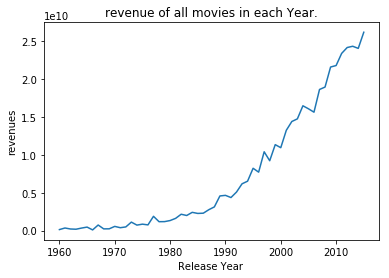

In [42]:
revenues_year = df.groupby('release_year')['revenue'].sum()

#x-axis
plt.xlabel('Release Year ')
#y-axis
plt.ylabel('revenues')
#title
plt.title('revenue of all movies in each Year.')
plt.plot(revenues_year)
plt.show()

In [43]:
revenues_year.idxmax()

2015

from this line chart we conclude the revenues of movies is Increasing from year to the next year , and 2015 has the most number of revenues .

3-what is the Average runtime of all the movies?

In [44]:
#this function print the avg of any column
def avg(column):
    return df[column].mean()
avg('runtime')

109.22029060716139

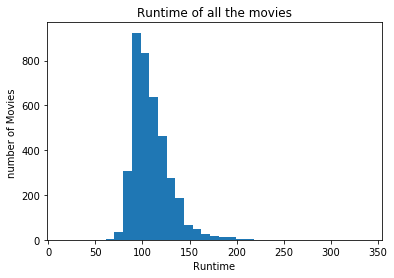

In [45]:
#x-axis 
plt.xlabel('Runtime')
#y-axis 
plt.ylabel('number of Movies ')
#Name of the graph
plt.title('Runtime of all the movies')

plt.hist(df['runtime'], bins =35)
plt.show()

In [46]:
df['runtime'].describe()

count    3854.000000
mean      109.220291
std        19.922820
min        15.000000
25%        95.000000
50%       106.000000
75%       119.000000
max       338.000000
Name: runtime, dtype: float64

This graph shows the runtime of all movies , which is right skewed , This means that the data is generally clustered around a small value and as you look for larger there are fewer .
 the avrage of runtime is 109.22.

4-Which genres are most popular from year to year?

In [47]:
#This function calculates the top of any category
def data(column):
    #separate the string by '|'
    data = df[column].str.cat(sep = '|')    
    data = pd.Series(data.split('|'))
    
    count = data.value_counts(ascending = False)
    
    return count

In [48]:
count = data('genres')
#printing the top 3
count.head(3)

Drama       1756
Comedy      1358
Thriller    1204
dtype: int64

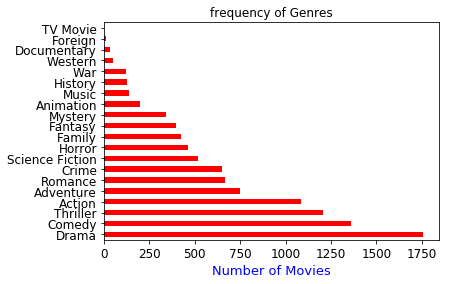

In [49]:

graph = count.plot.barh(color = 'red', fontsize = 12)
#title
graph.set(title='frequency of Genres')

#x axis
graph.set_xlabel('Number of Movies', color = 'blue', fontsize = '13')
plt.show()

The most popular of genres is drama then comedy movies . 

 5-What’s casts, directors, keywords, genres are associated with high popularity?

In [50]:
#found the three highest occurrences in each category
#cast
count = data('cast')
c=count.head(3)
#director
count = data('director')
q=count.head(3)
#keywords
count = data('keywords')
a=count.head(3)
#genres
count = data('genres')
k=count.head(3)


In [51]:
#Use the result above to create a summary dataframe.
df_popular = pd.DataFrame({'cast': c.index, 'director': q.index, 'keywords': a.index, 'genres': k.index})
df_popular

,cast,director,keywords,genres
0,Robert De Niro,Steven Spielberg,based on novel,Drama
1,Bruce Willis,Clint Eastwood,duringcreditsstinger,Comedy
2,Samuel L. Jackson,Ridley Scott,dystopia,Thriller


We conclude that movies that have a high popularity, it have cast :Robert De Niro or Bruce Willis or Samuel L. Jackson , and the directors :Steven Spielberg	 or Steven Spielberg or Ridley Scott, and the keywords:based on novel or dystopia, and the genres : Drama or Comedy or Thriller

6-Top voting movies always have a long runtime?

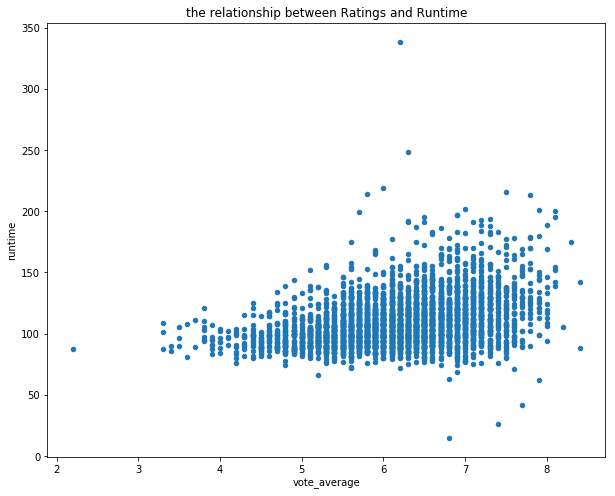

In [56]:
# Plot scatter plot of these two columns
df.plot(x='vote_average', y='runtime', kind='scatter', figsize=(10,8))
plt.title('the relationship between Ratings and Runtime')
plt.xlabel('vote_average')
plt.ylabel('runtime');

we conclude If the movie short, it's likely to have a mid to high voting.

and the movies with a runtime of around 100 min are unpredictable, it can be a low or high vote.

and the movies with a runtime above or below 100 minutes tend to have mid to high voting

 <a id='conclusions'></a>
## Conclusions

I found out the properties that are associated with high popularity movies. They were with high budget levels and longer run time. And cast associated with high popularity movies are Robert De Niro and Bruce Willis; director associated with high popularity movies are Steven Spielberg; genres associated with high popularity movies are drama, comedy, and thriller , keywords associated with high popularity movies are based on novel and dystopia .and possibility if these properties are achieved is that the movie it will be sucssesful.
and we conclude high vote movies is not always have a long runtime.

 Limitations:
 
  The budget and revenue column do not have currency unit, it might be possible different movies have budget in different     currency according to the country they are produce in. So a disparity arises here which can state the complete analysis wrong.

 Dropping the rows with missing values also affected the overall analysis.
 